In [52]:
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os
import sys

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'

osp = MAC

## Determine appropriate RT window for JoinAligner

In [4]:
with open(osp+'pymz/mzmine/std_matches.txt', 'rb') as file:
    stds_matches = pickle.load(file)

In [5]:
stds_matches

{'serotonin': {'Mal_Std1_1_20Dec16': (1754,
   177.1023178100586,
   4.0217,
   3782182.2901406214),
  'Hat_Std1_2_20150130': (766, 177.1022339, 12.52536667, 259000000.0),
  'Hat_Std1_1_20150130': (874, 177.1022339, 12.4576, 306000000.0)},
 'melatonin': {'Mal_Std1_1_20Dec16': (2490,
   233.12831115722656,
   4.3155833333333335,
   33276196048.949608),
  'Mal_Std1_2_20Dec16': (2584,
   233.12832641601562,
   4.302533333333333,
   33772812929.161053),
  'VL_Std1_1_06Mar18': (3230,
   233.1283416748047,
   4.251833333333334,
   25597167515.199986),
  'VL_Std1_2_06Mar18': (2853,
   233.12835693359375,
   4.288749999999999,
   19683997207.912857),
  'Zik_Std1_1_23Oct18': (2668,
   233.12841796875,
   4.091466666666666,
   38876808977.52192),
  'Zik_Std1_2_23Oct18': (2884, 233.1283721923828, 4.0523, 40561910106.74934),
  'Tryps_stds1_2_24May16': (217,
   233.1282196044922,
   4.534083333333333,
   621267468.1495755),
  'Hat_Std1_2_20150130': (1055, 233.1282959, 5.982183333, 3110000000.0),
  

In [49]:
#Determine how many metabolites they are supposed to have in common
c= 0
file1 = mal3_files[0]
file2 = mal3_files[1]
file3 = zik3_files[0]
file4 = zik3_files[1]
for key in stds_matches:
    if file1 in stds_matches[key].keys() and file2 in stds_matches[key].keys():
        if file3 in stds_matches[key].keys() and file4 in stds_matches[key].keys(): 
            c +=1
print(c)        
    

8


In [ ]:
mal 37 32 8

In [ ]:
vl 32 27 9

In [ ]:
tryps 31 30 9

In [26]:
rt_window = [0.01,0.05,0.08, 0.16, 0.3, 0.5, 0.66, 0.83, 1, 1.16, 1.3, 1.5, 1.66, 1.83, 2]
xml_template = os.path.join('/Users/anamaria/git/mma/mma/mzmine_batch_files/align_from_mztab.xml')
output_dir = os.path.join(osp,'pymz/mzmine/peak_picked_files/standards')
output_dir_changed_rt = os.path.join(osp, 'pymz/mzmine/peak_picked_files/standards_changed_rt')

all1_files = ['Zik_Std1_1_23Oct18','Zik_Std1_2_23Oct18','Mal_Std1_1_20Dec16','Mal_Std1_2_20Dec16']
all2_files = ['Zik_Std2_1_23Oct18','Zik_Std2_2_23Oct18','Mal_Std2_1_20Dec16','Mal_Std2_2_20Dec16']
all3_files = ['Zik_Std3_1_23Oct18','Zik_Std3_2_23Oct18','Mal_Std3_1_20Dec16','Mal_Std3_2_20Dec16']

allvl1_files = ['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18','Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
allvl2_files = ['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18','Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
allvl3_files = ['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18','Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']

allhat1_files = ['Hat_Std1_1_20150130', 'Hat_Std1_2_20150130','Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
allhat2_files = ['Hat_Std2_1_20150130', 'Hat_Std2_2_20150130','Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
allhat3_files = ['Hat_Std3_1_20150130', 'Hat_Std3_1_20150130','Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']

alltryps1_files = ['Tryps_stds1_1_24May16', 'Tryps_stds1_2_24May16','Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
alltryps2_files = ['Tryps_stds2_1_24May16', 'Tryps_stds2_2_24May16','Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
alltryps3_files = ['Tryps_stds3_1_24May16', 'Tryps_stds3_2_24May16','Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']

zik1_files = ['Zik_Std1_1_23Oct18','Zik_Std1_2_23Oct18']
zik2_files = ['Zik_Std2_1_23Oct18','Zik_Std2_2_23Oct18']
zik3_files = ['Zik_Std3_1_23Oct18','Zik_Std3_2_23Oct18']

mal1_files = ['Mal_Std1_1_20Dec16','Mal_Std1_2_20Dec16']
mal2_files = ['Mal_Std2_1_20Dec16','Mal_Std2_2_20Dec16']
mal3_files = ['Mal_Std3_1_20Dec16','Mal_Std3_2_20Dec16']

vl1_files = ['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18']
vl2_files = ['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18']
vl3_files = ['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18']

In [7]:
hat1_files = ['Hat_Std1_1_20150130', 'Hat_Std1_2_20150130']
hat2_files= ['Hat_Std2_1_20150130', 'Hat_Std2_2_20150130']
hat3_files = ['Hat_Std3_1_20150130', 'Hat_Std3_1_20150130']


In [10]:
tryps1_files = ['Tryps_stds1_2_24May16']
tryps2_files = ['Tryps_stds2_2_24May16']
tryps3_files = ['Tryps_stds3_2_24May16']

alltryps1_files = ['Tryps_stds1_2_24May16', 'Zik_Std1_2_23Oct18']
alltryps2_files = [ 'Tryps_stds2_2_24May16', 'Zik_Std2_2_23Oct18']
alltryps3_files = [ 'Tryps_stds3_2_24May16', 'Zik_Std3_2_23Oct18']

In [7]:
sys.path.append('..')
from metab_utils import get_total_stds
print(get_total_stds('Mal_Std1_1_20Dec16', stds_matches), get_total_stds('Mal_Std1_2_20Dec16', stds_matches))
print(get_total_stds('Mal_Std2_1_20Dec16', stds_matches), get_total_stds('Mal_Std2_2_20Dec16', stds_matches))
print(get_total_stds('Mal_Std3_1_20Dec16', stds_matches), get_total_stds('Mal_Std3_2_20Dec16', stds_matches))

print(get_total_stds('Zik_Std1_1_23Oct18', stds_matches), get_total_stds('Zik_Std1_2_23Oct18', stds_matches))
print(get_total_stds('Zik_Std2_1_23Oct18', stds_matches), get_total_stds('Zik_Std2_2_23Oct18', stds_matches))
print(get_total_stds('Zik_Std3_1_23Oct18', stds_matches), get_total_stds('Zik_Std3_2_23Oct18', stds_matches))

print(get_total_stds('VL_Std1_1_06Mar18', stds_matches), get_total_stds('VL_Std1_2_06Mar18', stds_matches))
print(get_total_stds('VL_Std2_1_06Mar18', stds_matches), get_total_stds('VL_Std2_2_06Mar18', stds_matches))
print(get_total_stds('VL_Std3_1_06Mar18', stds_matches), get_total_stds('VL_Std3_2_06Mar18', stds_matches))

47 37
46 44
13 14
38 38
42 34
10 11
32 35
40 38
12 12


In [9]:
print(get_total_stds('Tryps_stds1_1_24May16', stds_matches), get_total_stds('Tryps_stds1_2_24May16', stds_matches))
print(get_total_stds('Tryps_stds2_1_24May16', stds_matches), get_total_stds('Tryps_stds2_2_24May16', stds_matches))
print(get_total_stds('Tryps_stds3_1_24May16', stds_matches), get_total_stds('Tryps_stds3_2_24May16', stds_matches))

0 33
0 39
0 13


In [81]:
print(np.min((get_total_stds('Zik_Std1_1_23Oct18', stds_matches), get_total_stds('Zik_Std1_2_23Oct18', stds_matches),
       get_total_stds('Mal_Std1_1_20Dec16', stds_matches), get_total_stds('Mal_Std1_2_20Dec16', stds_matches))))
print(np.min((get_total_stds('Zik_Std2_1_23Oct18', stds_matches), get_total_stds('Zik_Std2_2_23Oct18', stds_matches),
            get_total_stds('Mal_Std2_1_20Dec16', stds_matches), get_total_stds('Mal_Std2_2_20Dec16', stds_matches))))
print(np.min((get_total_stds('Zik_Std3_1_23Oct18', stds_matches), get_total_stds('Zik_Std3_2_23Oct18', stds_matches),
            get_total_stds('Mal_Std3_1_20Dec16', stds_matches), get_total_stds('Mal_Std3_2_20Dec16', stds_matches))))

37
34
10


In [65]:
print(np.min((get_total_stds('Zik_Std1_1_23Oct18', stds_matches), get_total_stds('Zik_Std1_2_23Oct18', stds_matches),
       get_total_stds('VL_Std1_1_06Mar18', stds_matches), get_total_stds('VL_Std1_2_06Mar18', stds_matches))))
print(np.min((get_total_stds('Zik_Std2_1_23Oct18', stds_matches), get_total_stds('Zik_Std2_2_23Oct18', stds_matches),
            get_total_stds('VL_Std2_1_06Mar18', stds_matches), get_total_stds('VL_Std2_2_06Mar18', stds_matches))))
print(np.min((get_total_stds('Zik_Std3_1_23Oct18', stds_matches), get_total_stds('Zik_Std3_2_23Oct18', stds_matches),
            get_total_stds('VL_Std3_1_06Mar18', stds_matches), get_total_stds('VL_Std3_2_06Mar18', stds_matches))))

32
34
10


In [19]:
print(np.min(( get_total_stds('Zik_Std1_2_23Oct18', stds_matches),get_total_stds('Tryps_stds1_2_24May16', stds_matches))))
print(np.min(( get_total_stds('Zik_Std2_2_23Oct18', stds_matches),get_total_stds('Tryps_stds2_2_24May16', stds_matches))))
print(np.min(( get_total_stds('Zik_Std3_2_23Oct18', stds_matches),get_total_stds('Tryps_stds3_2_24May16', stds_matches))))

33
34
11


In [91]:
print(np.min((get_total_stds('Zik_Std1_1_23Oct18', stds_matches), get_total_stds('Zik_Std1_2_23Oct18', stds_matches),
       get_total_stds(hat1_files[0], stds_matches), get_total_stds(hat1_files[1], stds_matches))))
print(np.min((get_total_stds('Zik_Std2_1_23Oct18', stds_matches), get_total_stds('Zik_Std2_2_23Oct18', stds_matches),
            get_total_stds(hat2_files[0], stds_matches), get_total_stds(hat2_files[1], stds_matches))))
print(np.min((get_total_stds('Zik_Std3_1_23Oct18', stds_matches), get_total_stds('Zik_Std3_2_23Oct18', stds_matches),
            get_total_stds(hat3_files[0], stds_matches), get_total_stds(hat3_files[1], stds_matches))))

38
34
10


In [10]:
print(get_total_stds(hat1_files[0], stds_matches), get_total_stds(hat1_files[1], stds_matches))
print(get_total_stds(hat2_files[0], stds_matches), get_total_stds(hat2_files[1], stds_matches))
print(get_total_stds(hat3_files[0], stds_matches), get_total_stds(hat3_files[1], stds_matches))


46 45
46 45
10 10


In [13]:
sys.path.append('..')
from metab_utils import get_peaks_for_files
xml_template = os.path.join('/Users/anamaria/git/pymzm_mine/AnaMariaNotebooks/mzmine_batch_files/align_from_mztab.xml')
output_dir = os.path.join(osp, 'pymz/mzmine/peak_picked_files/standards_alignment/')
hat_dict_peaks = get_peaks_for_files(output_dir+'hat_stds1', hat1_files, rt_window, xml_template, stds_matches)
hat2_dict_peaks = get_peaks_for_files(output_dir+'hat_stds2', hat2_files, rt_window, xml_template, stds_matches)
hat3_dict_peaks = get_peaks_for_files(output_dir+'hat_stds3', hat3_files, rt_window, xml_template, stds_matches)

['Hat_Std1_1_20150130', 'Hat_Std1_2_20150130']
0.01


AssertionError: 

In [ ]:
sys.path.append('..')
from metab_utils import get_peaks_for_files
output_dir = os.path.join(osp, 'pymz/mzmine/peak_picked_files/standards_alignment/')
zik_dict_peaks = get_peaks_for_files(output_dir+'zik_stds1', zik1_files, rt_window, xml_template, stds_matches)
zik2_dict_peaks = get_peaks_for_files(output_dir+'zik_stds2', zik2_files, rt_window, xml_template, stds_matches)
zik3_dict_peaks = get_peaks_for_files(output_dir+'zik_stds3', zik3_files, rt_window, xml_template, stds_matches)

['Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08


In [ ]:
mal_dict_peaks_before = get_peaks_for_files(output_dir+'mal_stds1', mal1_files, rt_window, xml_template, stds_matches)
mal2_dict_peaks_before = get_peaks_for_files(output_dir+'mal_stds2', mal2_files, rt_window, xml_template, stds_matches)
mal3_dict_peaks_before = get_peaks_for_files(output_dir+'mal_stds3', mal3_files, rt_window, xml_template, stds_matches)

In [ ]:
vl_dict_peaks_before = get_peaks_for_files(output_dir+'vl_stds1', vl1_files, rt_window, xml_template, stds_matches)
vl2_dict_peaks_before = get_peaks_for_files(output_dir+'vl_stds2', vl2_files, rt_window, xml_template, stds_matches)
vl3_dict_peaks_before = get_peaks_for_files(output_dir+'vl_stds3', vl3_files, rt_window, xml_template, stds_matches)

In [ ]:
mal_dict_peaks_after = get_peaks_for_files(output_dir+'mal_stds1_changed_rt', mal1_files, rt_window, xml_template, stds_matches)
mal2_dict_peaks_after = get_peaks_for_files(output_dir+'mal_stds2_changed_rt', mal2_files, rt_window, xml_template, stds_matches)
mal3_dict_peaks_after = get_peaks_for_files(output_dir+'mal_stds3_changed_rt', mal3_files, rt_window, xml_template, stds_matches)

In [ ]:
vl_dict_peaks_after = get_peaks_for_files(output_dir+'vl_stds1_changed_rt', vl1_files, rt_window, xml_template, stds_matches)
vl2_dict_peaks_after = get_peaks_for_files(output_dir+'vl_stds2_changed_rt', vl2_files, rt_window, xml_template, stds_matches)
vl3_dict_peaks_after = get_peaks_for_files(output_dir+'vl_stds3_changed_rt', vl3_files, rt_window, xml_template, stds_matches)

In [ ]:
combined_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_mal_1', all1_files, rt_window, xml_template, stds_matches)
combined2_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_mal_2', all2_files, rt_window, xml_template, stds_matches)
combined3_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_mal_3', all3_files, rt_window, xml_template, stds_matches)


In [13]:
combined_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_mal_1_changed_rt', all1_files, rt_window, xml_template, stds_matches)
combined2_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_mal_2_changed_rt', all2_files, rt_window, xml_template, stds_matches)
combined3_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_mal_3_changed_rt', all3_files, rt_window, xml_template, stds_matches)

['Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18', 'Mal_Std1_1_20Dec16', 'Mal_Std1_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18', 'Mal_Std2_1_20Dec16', 'Mal_Std2_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18', 'Mal_Std3_1_20Dec16', 'Mal_Std3_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [14]:
combinedvl_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_vl_1', allvl1_files, rt_window, xml_template, stds_matches)
combinedvl2_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_vl_2', allvl2_files, rt_window, xml_template, stds_matches)
combinedvl3_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_vl_3', allvl3_files, rt_window, xml_template, stds_matches)

['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18', 'Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18', 'Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [15]:
combinedvl_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_vl_1_changed_rt', allvl1_files, rt_window, xml_template, stds_matches)
combinedvl2_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_vl_2_changed_rt', allvl2_files, rt_window, xml_template, stds_matches)
combinedvl3_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_vl_3_changed_rt', allvl3_files, rt_window, xml_template, stds_matches)

['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18', 'Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18', 'Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [29]:
combinedhat3_dict_peaks_before

{"['Hat_Std3_1_20150130', 'Hat_Std3_1_20150130', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']": [(10594,
   0),
  (9298, 0),
  (8796, 0),
  (8234, 0),
  (7818, 0),
  (7595, 0),
  (7510, 0),
  (7412, 0),
  (7333, 0),
  (7271, 0),
  (7230, 0),
  (7163, 1),
  (7110, 2),
  (7081, 2),
  (7036, 2)]}

In [27]:
output_dir = os.path.join(osp, 'pymz/mzmine/peak_picked_files/standards_alignment/')
combinedhat_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_hat_1', allhat1_files, rt_window, xml_template, stds_matches)
combinedhat2_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_hat_2', allhat2_files, rt_window, xml_template, stds_matches)
combinedhat3_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_hat_3', allhat3_files, rt_window, xml_template, stds_matches)

['Hat_Std2_1_20150130', 'Hat_Std2_2_20150130', 'Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Hat_Std3_1_20150130', 'Hat_Std3_1_20150130', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [30]:
combinedhat_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_hat_1_changed_rt', allhat1_files, rt_window, xml_template, stds_matches)
combinedhat2_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_hat_2_changed_rt', allhat2_files, rt_window, xml_template, stds_matches)
combinedhat3_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_hat_3_changed_rt', allhat3_files, rt_window, xml_template, stds_matches)

['Hat_Std1_1_20150130', 'Hat_Std1_2_20150130', 'Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Hat_Std2_1_20150130', 'Hat_Std2_2_20150130', 'Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Hat_Std3_1_20150130', 'Hat_Std3_1_20150130', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [11]:
sys.path.append('..')
from metab_utils import get_peaks_for_files
xml_template = os.path.join('/Users/anamaria/git/pymzm_mine/AnaMariaNotebooks/mzmine_batch_files/align_from_mztab.xml')
output_dir = os.path.join(osp, 'pymz/mzmine/peak_picked_files/standards_alignment/')
combinedtryps_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_tryps_1', alltryps1_files, rt_window, xml_template, stds_matches)
combinedtryps2_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_tryps_2', alltryps2_files, rt_window, xml_template, stds_matches)
combinedtryps3_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_tryps_3', alltryps3_files, rt_window, xml_template, stds_matches)

combinedtryps_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_tryps_1_changed_rt', alltryps1_files, rt_window, xml_template, stds_matches)
combinedtryps2_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_tryps_2_changed_rt', alltryps2_files, rt_window, xml_template, stds_matches)
combinedtryps3_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_tryps_3_changed_rt', alltryps3_files, rt_window, xml_template, stds_matches)

['Tryps_stds1_2_24May16', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Tryps_stds2_2_24May16', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Tryps_stds3_2_24May16', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Tryps_stds1_2_24May16', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Tryps_stds2_2_24May16', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Tryps_stds3_2_24May16', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [16]:
combined1 = pd.DataFrame.from_dict(combined_dict_peaks_before).transpose()
combined2 = pd.DataFrame.from_dict(combined2_dict_peaks_before).transpose()
combined3 = pd.DataFrame.from_dict(combined3_dict_peaks_before).transpose()

In [17]:
combined1_after = pd.DataFrame.from_dict(combined_dict_peaks_after).transpose()
combined2_after = pd.DataFrame.from_dict(combined2_dict_peaks_after).transpose()
combined3_after = pd.DataFrame.from_dict(combined3_dict_peaks_after).transpose()

In [18]:
combinedvl1 = pd.DataFrame.from_dict(combinedvl_dict_peaks_before).transpose()
combinedvl2 = pd.DataFrame.from_dict(combinedvl2_dict_peaks_before).transpose()
combinedvl3 = pd.DataFrame.from_dict(combinedvl3_dict_peaks_before).transpose()

In [19]:
combinedvl1_after = pd.DataFrame.from_dict(combinedvl_dict_peaks_after).transpose()
combinedvl2_after = pd.DataFrame.from_dict(combinedvl2_dict_peaks_after).transpose()
combinedvl3_after = pd.DataFrame.from_dict(combinedvl3_dict_peaks_after).transpose()

In [33]:
combinedhat1 = pd.DataFrame.from_dict(combinedhat_dict_peaks_before).transpose()
combinedhat2 = pd.DataFrame.from_dict(combinedhat2_dict_peaks_before).transpose()
combinedhat3 = pd.DataFrame.from_dict(combinedhat3_dict_peaks_before).transpose()

combinedhat1_after = pd.DataFrame.from_dict(combinedhat_dict_peaks_after).transpose()
combinedhat2_after = pd.DataFrame.from_dict(combinedhat2_dict_peaks_after).transpose()
combinedhat3_after = pd.DataFrame.from_dict(combinedhat3_dict_peaks_after).transpose()

In [12]:
combinedtryps1 = pd.DataFrame.from_dict(combinedtryps_dict_peaks_before).transpose()
combinedtryps2 = pd.DataFrame.from_dict(combinedtryps2_dict_peaks_before).transpose()
combinedtryps3 = pd.DataFrame.from_dict(combinedtryps3_dict_peaks_before).transpose()

combinedtryps1_after = pd.DataFrame.from_dict(combinedtryps_dict_peaks_after).transpose()
combinedtryps2_after = pd.DataFrame.from_dict(combinedtryps2_dict_peaks_after).transpose()
combinedtryps3_after = pd.DataFrame.from_dict(combinedtryps3_dict_peaks_after).transpose()

In [20]:
zik1 = pd.DataFrame.from_dict(zik_dict_peaks).transpose()
zik2 = pd.DataFrame.from_dict(zik2_dict_peaks).transpose()
zik3 = pd.DataFrame.from_dict(zik3_dict_peaks).transpose()

In [21]:
vl1 = pd.DataFrame.from_dict(vl_dict_peaks_before).transpose()
vl1_after = pd.DataFrame.from_dict(vl_dict_peaks_after).transpose()
vl2 = pd.DataFrame.from_dict(vl2_dict_peaks_before).transpose()
vl2_after = pd.DataFrame.from_dict(vl2_dict_peaks_after).transpose()
vl3 = pd.DataFrame.from_dict(vl3_dict_peaks_before).transpose()
vl3_after = pd.DataFrame.from_dict(vl3_dict_peaks_after).transpose()

In [22]:
mal1 = pd.DataFrame.from_dict(mal_dict_peaks_before).transpose()
mal1_after = pd.DataFrame.from_dict(mal_dict_peaks_after).transpose()
mal2 = pd.DataFrame.from_dict(mal2_dict_peaks_before).transpose()
mal2_after = pd.DataFrame.from_dict(mal2_dict_peaks_after).transpose()
mal3 = pd.DataFrame.from_dict(mal3_dict_peaks_before).transpose()
mal3_after = pd.DataFrame.from_dict(mal3_dict_peaks_after).transpose()

In [23]:
combined = pd.concat([combined1,combined1_after,combined2, combined2_after, combined3,combined3_after ])
combined.columns = [rt*60 for rt in rt_window]
combined = combined.transpose()
combined.columns = ['Stds1', 'Stds1_Correction', 'Stds2', 'Stds2_Correction', 'Stds3', 'Stds3_Correction']

In [24]:
combinedvl = pd.concat([combinedvl1,combinedvl1_after,combinedvl2, combinedvl2_after, combinedvl3,combinedvl3_after ])
combinedvl.columns = [rt*60 for rt in rt_window]
combinedvl = combinedvl.transpose()
combinedvl.columns = ['Stds1', 'Stds1_Correction', 'Stds2', 'Stds2_Correction', 'Stds3', 'Stds3_Correction']

In [34]:
combinedhat = pd.concat([combinedhat1,combinedhat1_after,combinedhat2, combinedhat2_after, 
                         combinedhat3,combinedhat3_after ])
combinedhat.columns = [rt*60 for rt in rt_window]
combinedhat = combinedhat.transpose()
combinedhat.columns = ['Stds1', 'Stds1_Correction', 'Stds2', 'Stds2_Correction', 'Stds3', 'Stds3_Correction']

In [13]:
combinedtryps = pd.concat([combinedtryps1,combinedtryps1_after,combinedtryps2, combinedtryps2_after, 
                         combinedtryps3,combinedtryps3_after ])
combinedtryps.columns = [rt*60 for rt in rt_window]
combinedtryps = combinedtryps.transpose()
combinedtryps.columns = ['Stds1', 'Stds1_Correction', 'Stds2', 'Stds2_Correction', 'Stds3', 'Stds3_Correction']

In [25]:
zik = pd.concat([zik1,zik2,zik3])
zik.columns = [rt*60 for rt in rt_window]
zik = zik.transpose()
zik.columns = ['Zik1', 'Zik2', 'Zik3']

In [26]:
mal = pd.concat([mal1,mal1_after,mal2,mal2_after,mal3, mal3_after])
mal.columns = [rt*60 for rt in rt_window]
mal = mal.transpose()
mal.columns = ['Mal1','Mal1_Correction', 'Mal2','Mal2_Correction', 'Mal3', 'Mal3_Correction']

In [27]:
vl = pd.concat([vl1,vl1_after,vl2,vl2_after,vl3, vl3_after])
vl.columns = [rt*60 for rt in rt_window]
vl = vl.transpose()
vl.columns = ['VL1','VL1_Correction', 'VL2','VL2_Correction', 'VL3', 'VL3_Correction']

In [28]:
mal

,Mal1,Mal1_Correction,Mal2,Mal2_Correction,Mal3,Mal3_Correction
0.6,"(7741, 13)","(7744, 13)","(8389, 9)","(8373, 9)","(7134, 2)","(7127, 2)"
3.0,"(6636, 32)","(6637, 32)","(7211, 24)","(7213, 24)","(6316, 6)","(6305, 6)"
4.8,"(6300, 36)","(6297, 36)","(6726, 35)","(6702, 35)","(5995, 8)","(5989, 8)"
9.6,"(6011, 37)","(6013, 37)","(6252, 39)","(6237, 39)","(5680, 8)","(5679, 8)"
18.0,"(5797, 37)","(5794, 37)","(6036, 40)","(6039, 40)","(5498, 8)","(5497, 8)"
30.0,"(5647, 37)","(5658, 37)","(5931, 40)","(5936, 40)","(5366, 9)","(5372, 9)"
39.6,"(5577, 37)","(5575, 37)","(5883, 40)","(5880, 40)","(5305, 9)","(5308, 9)"
49.8,"(5526, 37)","(5529, 37)","(5838, 40)","(5839, 40)","(5263, 9)","(5265, 9)"
60.0,"(5480, 37)","(5486, 37)","(5809, 40)","(5810, 40)","(5230, 9)","(5230, 9)"
69.6,"(5451, 37)","(5450, 37)","(5788, 40)","(5785, 40)","(5199, 9)","(5199, 9)"


In [29]:
zik

,Zik1,Zik2,Zik3
0.6,"(8496, 10)","(9457, 11)","(7638, 3)"
3.0,"(7162, 33)","(7796, 29)","(6692, 9)"
4.8,"(6678, 34)","(7336, 30)","(6399, 10)"
9.6,"(6281, 37)","(6989, 31)","(6120, 10)"
18.0,"(6072, 37)","(6790, 31)","(5912, 10)"
30.0,"(5952, 37)","(6657, 31)","(5783, 10)"
39.6,"(5906, 37)","(6610, 31)","(5740, 10)"
49.8,"(5868, 37)","(6559, 31)","(5695, 10)"
60.0,"(5840, 37)","(6525, 31)","(5653, 10)"
69.6,"(5809, 37)","(6482, 31)","(5622, 10)"


In [30]:
vl

,VL1,VL1_Correction,VL2,VL2_Correction,VL3,VL3_Correction
0.6,"(9649, 5)","(9554, 8)","(10509, 4)","(10346, 7)","(8312, 3)","(8239, 4)"
3.0,"(8472, 27)","(8224, 29)","(9151, 29)","(8793, 33)","(7467, 8)","(7256, 9)"
4.8,"(8011, 30)","(7839, 30)","(8562, 35)","(8307, 38)","(7106, 9)","(6914, 10)"
9.6,"(7600, 30)","(7529, 30)","(8019, 38)","(7907, 38)","(6667, 11)","(6579, 11)"
18.0,"(7402, 30)","(7372, 30)","(7776, 38)","(7740, 38)","(6436, 11)","(6386, 11)"
30.0,"(7283, 30)","(7256, 30)","(7646, 38)","(7622, 38)","(6309, 11)","(6277, 11)"
39.6,"(7227, 30)","(7196, 30)","(7582, 38)","(7559, 38)","(6260, 11)","(6220, 11)"
49.8,"(7167, 30)","(7148, 30)","(7530, 38)","(7513, 38)","(6211, 11)","(6172, 11)"
60.0,"(7120, 30)","(7077, 30)","(7498, 38)","(7474, 38)","(6163, 11)","(6143, 11)"
69.6,"(7085, 30)","(7033, 30)","(7465, 38)","(7434, 38)","(6120, 11)","(6104, 11)"


In [94]:
combined.to_csv(osp+'pymz/rtwindow_mal.csv')

In [50]:
combined = pd.read_csv(osp+'pymz/rtwindow_mal.csv', index_col = 0)

In [93]:
combinedvl.to_csv(osp+'pymz/rtwindow_vl.csv')

In [45]:
combinedvl = pd.read_csv(osp+'pymz/rtwindow_vl.csv', index_col = 0)

In [36]:
combinedhat.to_csv(osp+'pymz/rtwindow_hat.csv')

In [29]:
combinedhat = pd.read_csv(osp+'pymz/rtwindow_hat.csv', index_col = 0)

In [15]:
combinedtryps.to_csv(osp+'pymz/rtwindow_tryps.csv')

In [31]:
combinedtryps = pd.read_csv(osp+'pymz/rtwindow_tryps.csv', index_col = 0)

## Plots of different RT windows

In [40]:
rt_window = [*rt_window, *rt_window, *rt_window]

In [27]:
results_dir = osp+'results/300dpi'

In [23]:
def plot_peaks_rt(results_dir, dataframe, title, rt_window, maxim_metab, stds = True):
    
    fig, axs = plt.subplots(1,3,sharex=True, sharey=True, figsize = (26, 5))
    
    nice_fonts = {"text.usetex": True,
        "font.family": "serif",
        "font.serif" : "Times New Roman"}
    plt.rcParams.update(nice_fonts)

    plt.rc('font', family='serif', size = 15)
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    
    yaxis = "Aligned peaks"
    
    p = 0
    if stds:
        p = 1
        yaxis = "Aligned SRM metabolites"
        
    fig.text(0.5, 0.02, "JoinAligner RT Window (min)", ha='center', fontsize =25)
    fig.text(0.04, 0.5, yaxis, va='center', rotation='vertical', fontsize =25 )
    #plt.ylabel(yaxis, fontsize = 15)
    #plt.xlabel("JoinAligner RT Window (min)", fontsize = 15)
    
    for ax, x, n, m in zip(axs, range(1,4,1), range(0,6,2), maxim_metab):
        s = [eval(i)[p] for i in np.array(dataframe.transpose().iloc[n])]
        s1 = [eval(i)[p] for i in np.array(dataframe.transpose().iloc[n+1])]
        
        
        ax.plot(rt_window,s, label = 'Before GPR correction', color = '#E02A3F')
        ax.plot(rt_window,s1,label = 'After GPR correction', color = '#32E081')
        if stds:
            ax.plot(rt_window, [m]*len(rt_window),linestyle='dashed' ,label = 'Max. SRM metabolites', color = '#000000')
        
        handles, labels = ax.get_legend_handles_labels()

        
        ax.set_title('Set'+str(x))
        
    
    fig.legend(handles, labels, loc='upper right')
    fig.savefig(os.path.join(results_dir,title+'.png'),dpi=600, bbox_inches = 'tight')
    plt.show() 
        
    

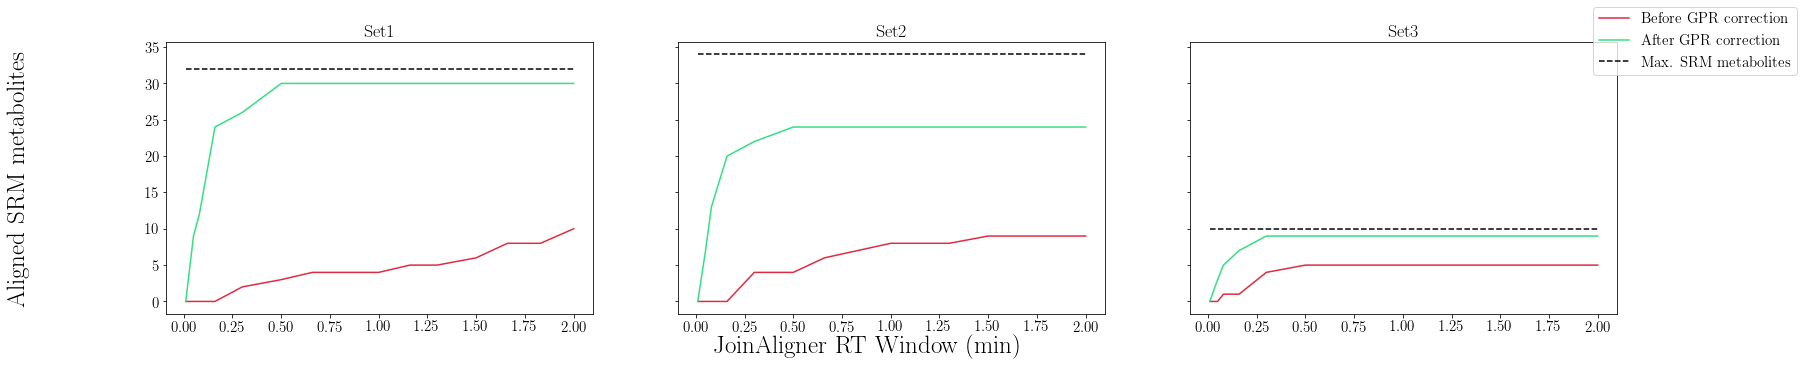

In [18]:
plot_peaks_rt(results_dir, combinedvl, "vl_standards", rt_window, maxim_metab = [32,34,10])

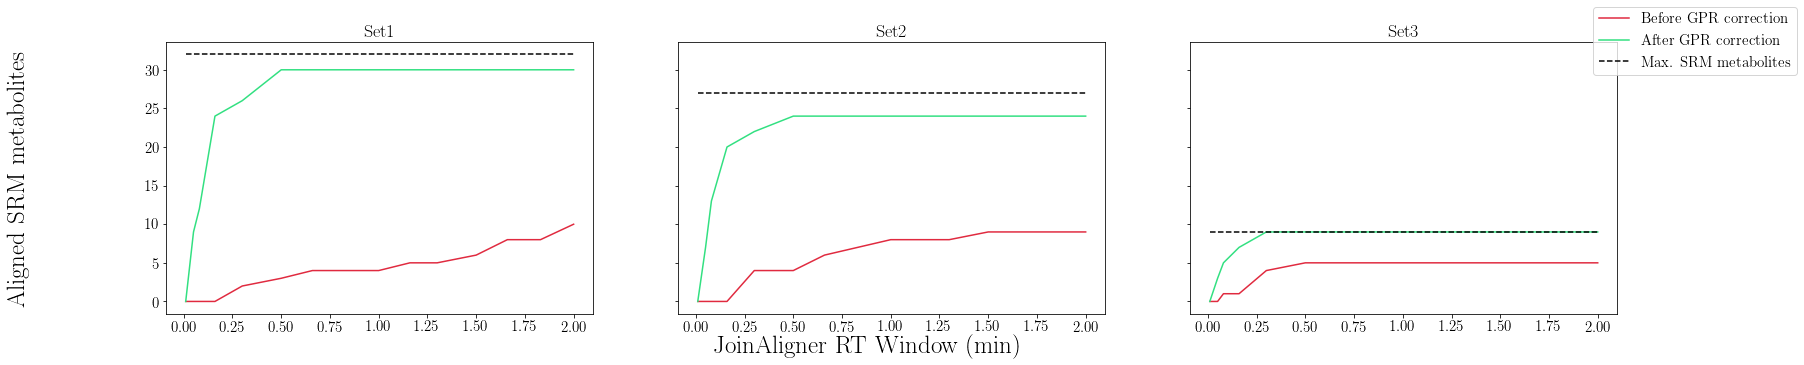

In [46]:
plot_peaks_rt(results_dir, combinedvl, "vl_standards", rt_window, maxim_metab = [32,27,9])

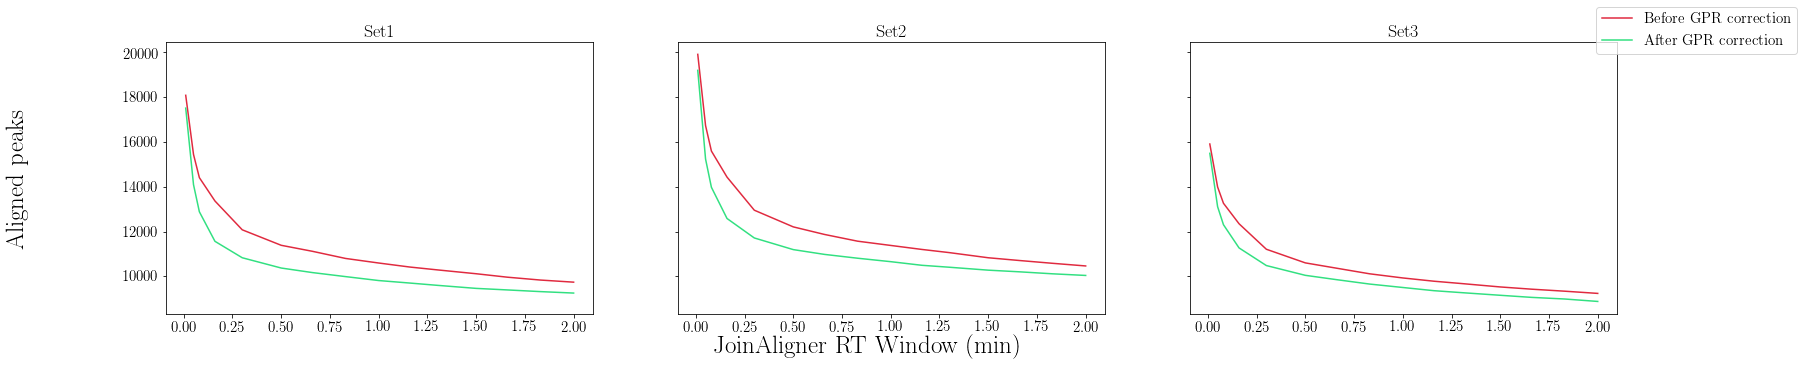

In [19]:
plot_peaks_rt(results_dir, combinedvl, "vl_peaks",rt_window, maxim_metab = [32,34,10], stds = False)

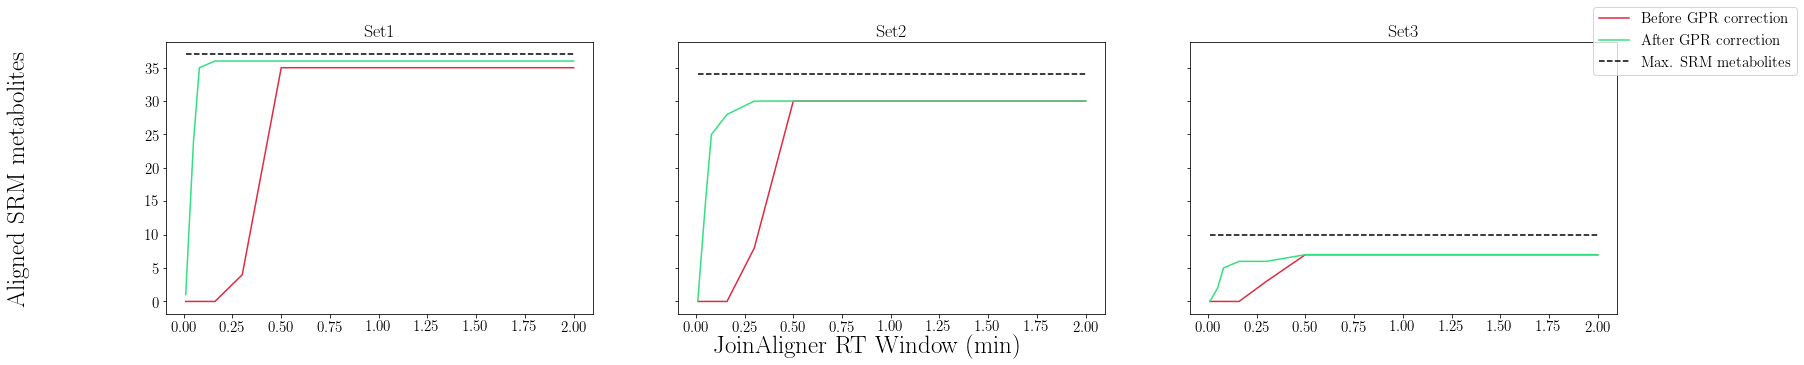

In [20]:
plot_peaks_rt(results_dir, combined, "mal_standards", rt_window, maxim_metab = [37,34,10])

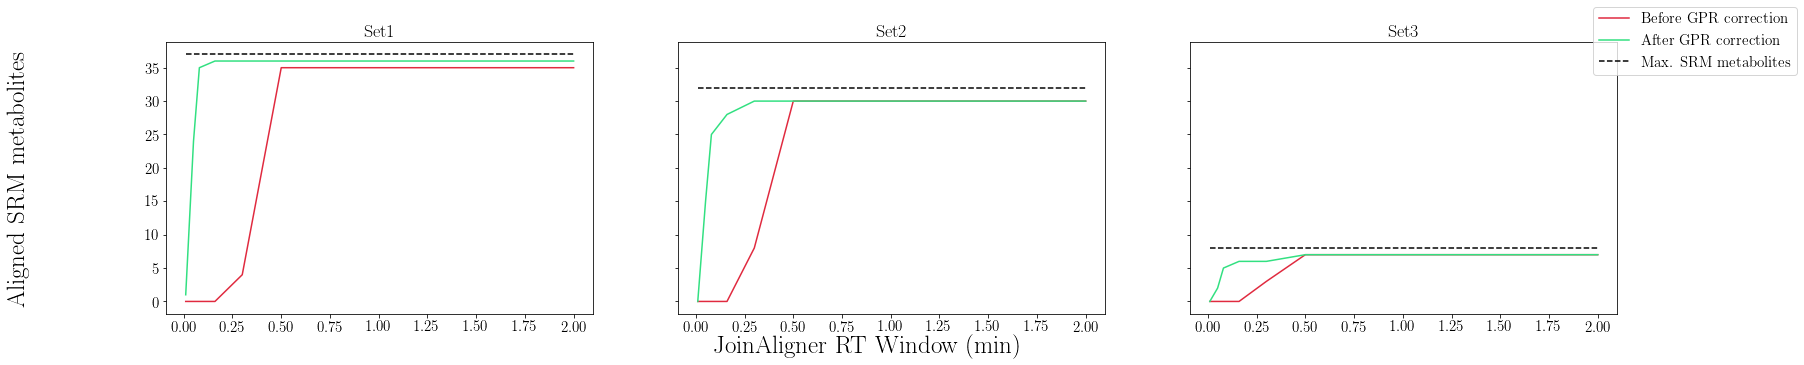

In [51]:
plot_peaks_rt(results_dir, combined, "mal_standards", rt_window, maxim_metab = [37,32,8])

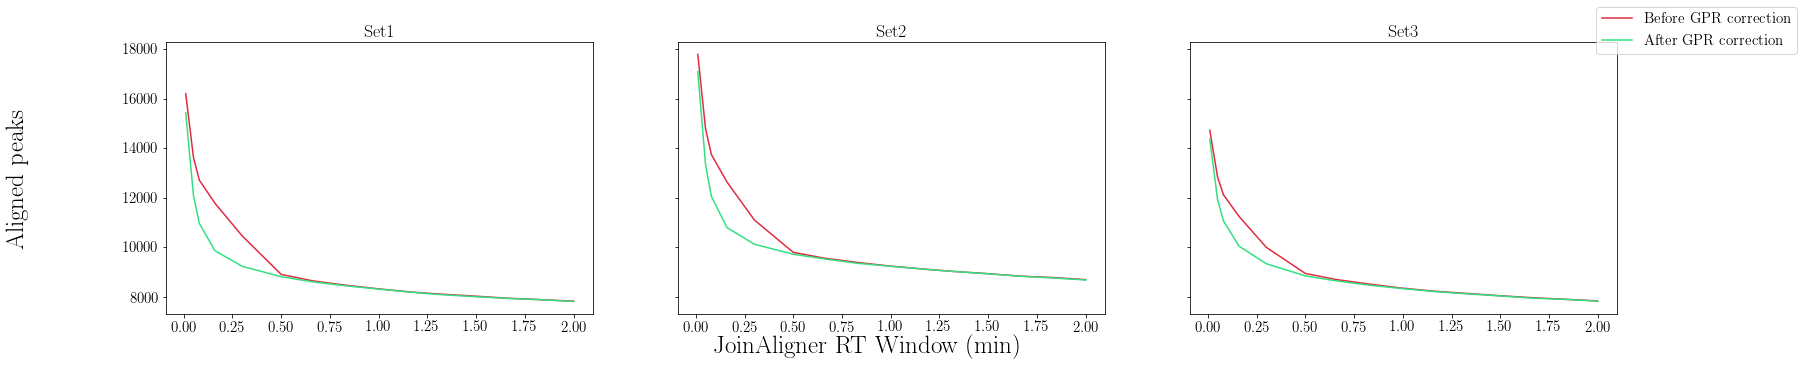

In [21]:
plot_peaks_rt(results_dir, combined, "mal_peaks",rt_window, stds = False, maxim_metab = [37,34,10])

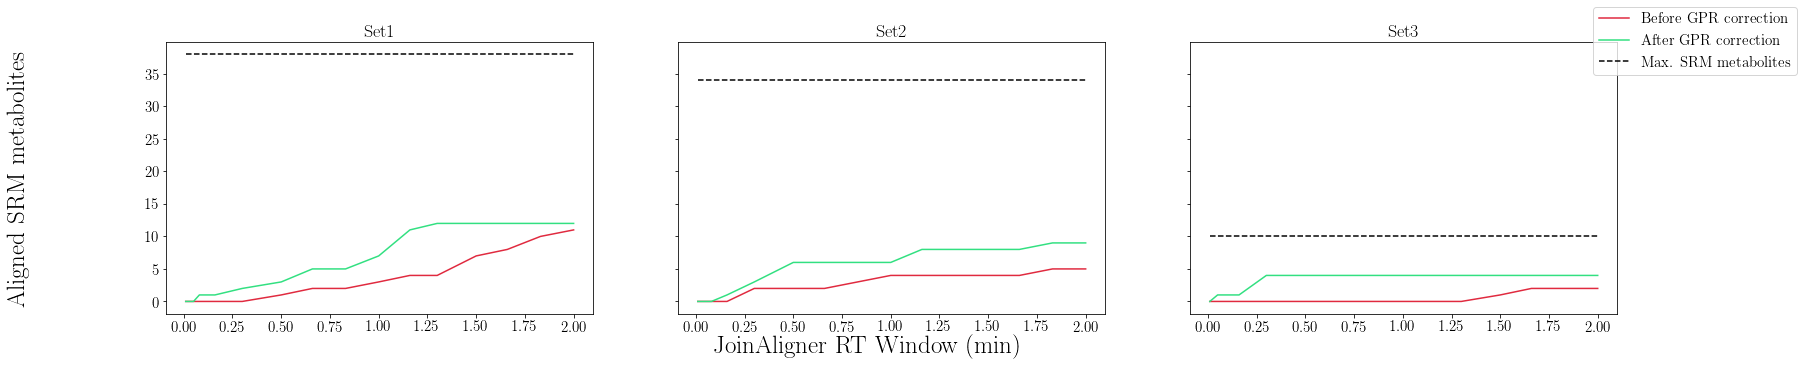

In [30]:
plot_peaks_rt(results_dir, combinedhat, "hat_standards", rt_window, maxim_metab = [38, 34, 10])

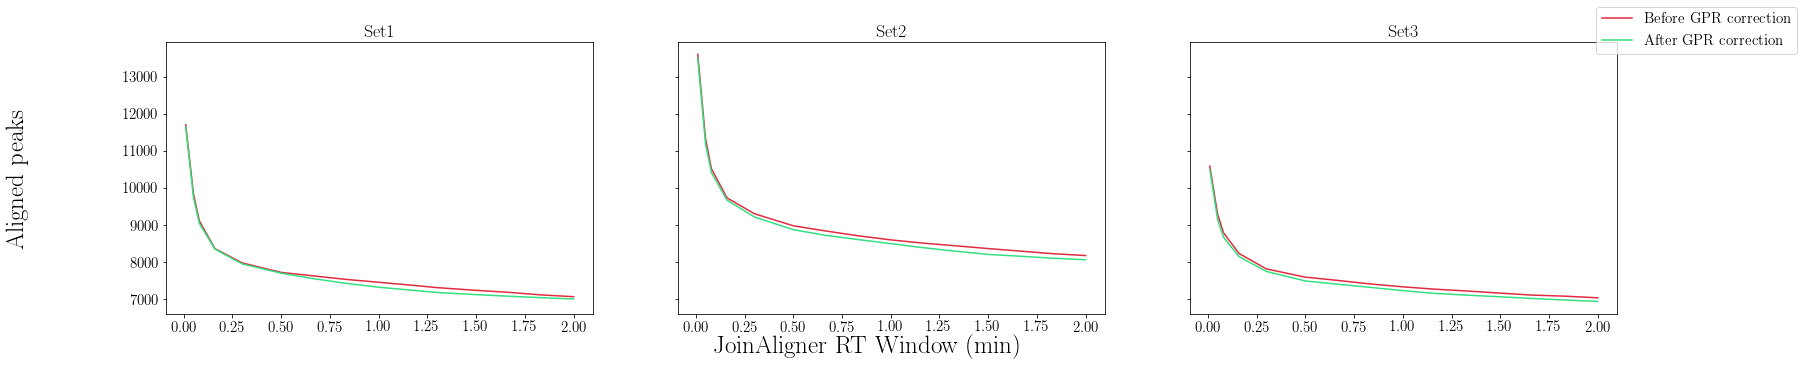

In [33]:
plot_peaks_rt(results_dir, combinedhat, "hat_peaks", rt_window, stds = False, maxim_metab = [38, 34, 10])

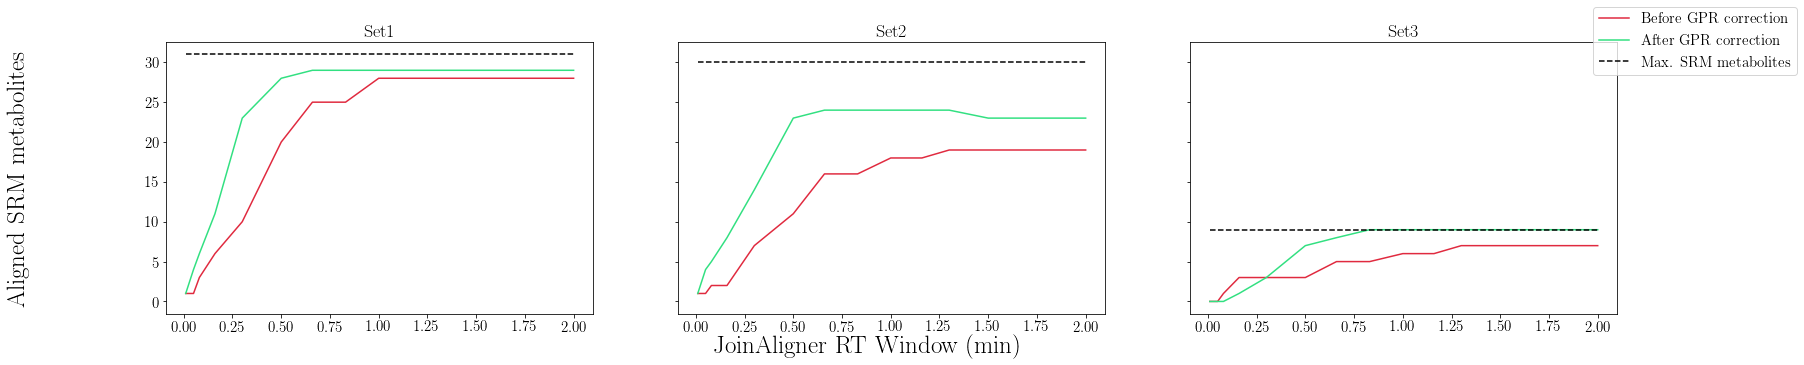

In [39]:
plot_peaks_rt(results_dir, combinedtryps, "tryps_standards", rt_window, maxim_metab = [31,30,9])

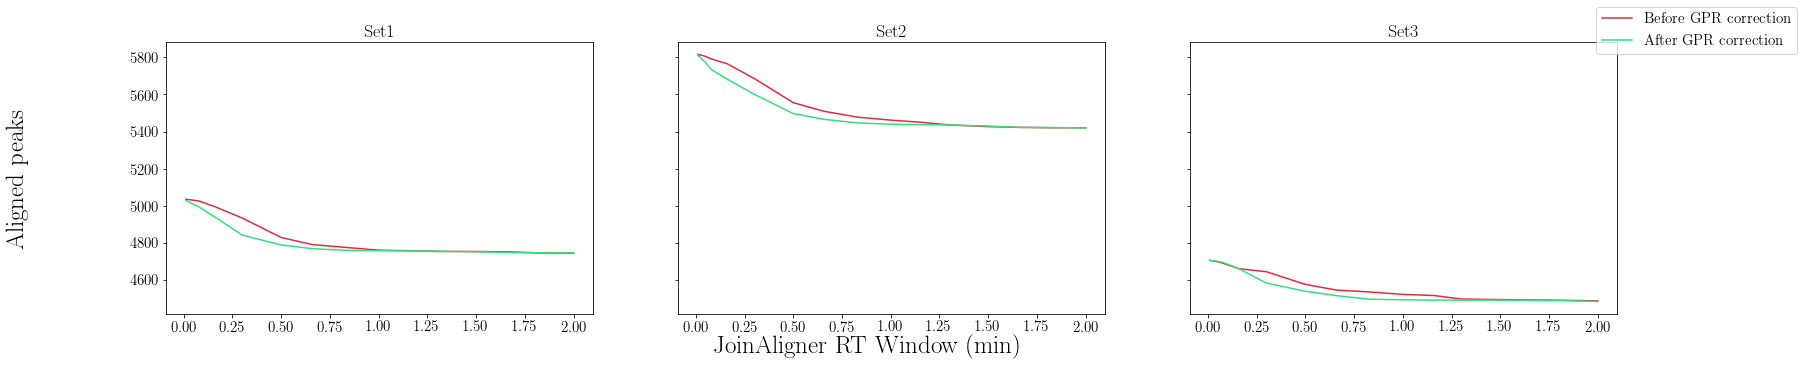

In [40]:
plot_peaks_rt(results_dir, combinedtryps, "tryps_peaks", rt_window, stds = False, maxim_metab = [31,30,9])